√ñnceki iki not defterinde (√∂zellik √ßƒ±karma ve ince ayar) transfer learningin g√ºc√ºn√º g√∂rd√ºk.

Artƒ±k daha k√º√ß√ºk modelleme deneylerimizin i≈üe yaradƒ±ƒüƒ±nƒ± biliyoruz, daha fazla veriyle i≈üleri bir adƒ±m √∂teye ta≈üƒ±manƒ±n zamanƒ± geldi.

Bu, makine √∂ƒürenimi ve derin √∂ƒürenmede yaygƒ±n bir uygulamadƒ±r: Daha b√ºy√ºk miktarda veriye √∂l√ßeklendirmeden √∂nce az miktarda veri √ºzerinde √ßalƒ±≈üan bir model edinin.

> üîë Not: Makine √∂ƒürenimi uygulayƒ±cƒ±larƒ±nƒ±n sloganƒ±nƒ± unutmadƒ±nƒ±z mƒ±? "Deney, deney, deney."

Food Vision projemizin hayata ge√ßmesine biraz daha yakla≈ümanƒ±n zamanƒ± geldi. Bu not defterinde, Food101 verilerinin 10 sƒ±nƒ±fƒ±nƒ± kullanmaktan, Food101 veri k√ºmesindeki t√ºm sƒ±nƒ±flarƒ± kullanmaya doƒüru √∂l√ßeklendireceƒüiz.

Hedefimiz, orijinal [Food101](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/static/bossard_eccv14_food-101.pdf) belgesinin sonu√ßlarƒ±nƒ± %10 veri ile ge√ßmektir.

- Food101 verilerinin %10'unun indirilmesi ve hazƒ±rlanmasƒ± (eƒüitim verilerinin %10'u)
- Food101 eƒüitim verilerinin %10'unda bir √∂zellik √ßƒ±karma aktarƒ±mƒ± √∂ƒürenme modeli eƒüitimi
- √ñzellik √ßƒ±karma modelimizin ince ayarƒ±nƒ± yapma
- Eƒüitilmi≈ü modelimizi kaydetme ve y√ºkleme
- Eƒüitim verilerinin %10'u √ºzerinden eƒüitilen Food Vision modelimizin performansƒ±nƒ±n deƒüerlendirilmesi
- Modelimizin en yanlƒ±≈ü tahminlerini bulma
- Food Vision modelimiz ile √∂zel gƒ±da g√∂rselleri √ºzerinde tahminlerde bulunmak

## Yardƒ±mcƒ± Fonksiyonlarƒ± Olu≈üturalƒ±m

In [1]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"{log_dir}")
  return tensorboard_callback

In [2]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [3]:
import zipfile

def unzip_data(filename):
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

In [4]:
def compare_historys(original_history, new_history, initial_epochs=5):
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') 
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

In [5]:
import os

def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"'{dirpath}' klas√∂r√ºnde {len(filenames)} veri var.")

In [36]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] 
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), 
         yticks=np.arange(n_classes), 
         xticklabels=labels,
         yticklabels=labels)
  
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  threshold = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  if savefig:
    fig.savefig("confusion_matrix.png")

## 101 Yemek Sƒ±nƒ±fƒ±: Daha Az Veriyle √áalƒ±≈ümak

≈ûimdiye kadar kullandƒ±ƒüƒ±mƒ±z transfer √∂ƒürenme modelinin 10 Yemek Sƒ±nƒ±fƒ± veri seti ile olduk√ßa iyi √ßalƒ±≈ütƒ±ƒüƒ±nƒ± onayladƒ±k. ≈ûimdi, tam 101 Yemek Sƒ±nƒ±fƒ± ile nasƒ±l gittiklerini g√∂rme zamanƒ±.

Orijinal Food101 veri setinde sƒ±nƒ±f ba≈üƒ±na 1000 g√∂r√ºnt√º (eƒüitim setindeki her sƒ±nƒ±ftan 750 ve test setindeki her sƒ±nƒ±ftan 250), toplam 101.000 g√∂r√ºnt√º vardƒ±r.


In [6]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip 

unzip_data("101_food_classes_10_percent.zip")

train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

--2021-07-20 10:29:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.128, 108.177.98.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‚Äò101_food_classes_10_percent.zip‚Äô

101_food_classes_10 100%[===================>]   1.51G   147MB/s    in 7.6s    

2021-07-20 10:29:42 (204 MB/s) - ‚Äò101_food_classes_10_percent.zip‚Äô saved [1625420029/1625420029]



In [7]:
walk_through_dir("101_food_classes_10_percent")

'101_food_classes_10_percent' klas√∂r√ºnde 0 veri var.
'101_food_classes_10_percent/train' klas√∂r√ºnde 0 veri var.
'101_food_classes_10_percent/train/croque_madame' klas√∂r√ºnde 75 veri var.
'101_food_classes_10_percent/train/frozen_yogurt' klas√∂r√ºnde 75 veri var.
'101_food_classes_10_percent/train/bruschetta' klas√∂r√ºnde 75 veri var.
'101_food_classes_10_percent/train/paella' klas√∂r√ºnde 75 veri var.
'101_food_classes_10_percent/train/dumplings' klas√∂r√ºnde 75 veri var.
'101_food_classes_10_percent/train/chicken_wings' klas√∂r√ºnde 75 veri var.
'101_food_classes_10_percent/train/french_onion_soup' klas√∂r√ºnde 75 veri var.
'101_food_classes_10_percent/train/baklava' klas√∂r√ºnde 75 veri var.
'101_food_classes_10_percent/train/risotto' klas√∂r√ºnde 75 veri var.
'101_food_classes_10_percent/train/gyoza' klas√∂r√ºnde 75 veri var.
'101_food_classes_10_percent/train/tiramisu' klas√∂r√ºnde 75 veri var.
'101_food_classes_10_percent/train/eggs_benedict' klas√∂r√ºnde 75 veri var.
'101_fo

G√∂rsellerimizi ve etiketlerimizi, dizini modelimize ge√ßirmemizi saƒülayan bir TensorFlow veri t√ºr√º olan tf.data.Dataset'e d√∂n√º≈üt√ºrmek i√ßin `image_dataset_from_directory()` i≈ülevini kullanalƒ±m.

Test veri k√ºmesi i√ßin, daha sonra √ºzerinde tekrarlanabilir deƒüerlendirme ve g√∂rselle≈ütirme yapabilmek i√ßin `shuffle=False` ayarƒ±nƒ± yapacaƒüƒ±z.


In [8]:
import tensorflow as tf

IMG_SIZE = (224, 224)

train_data_all_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                label_mode="categorical",
                                                                                image_size=IMG_SIZE)
                                                                                
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                shuffle=False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


Harika! Eƒüitim setinde sƒ±nƒ±f ba≈üƒ±na 75 g√∂r√ºnt√º (75 g√∂r√ºnt√º * 101 sƒ±nƒ±f = 7575 g√∂r√ºnt√º) ve test setinde 25250 g√∂r√ºnt√º (250 g√∂r√ºnt√º * 101 sƒ±nƒ±f = 25250 g√∂r√ºnt√º) ile verilerimiz beklendiƒüi gibi i√ße aktarƒ±lmƒ±≈ü gibi g√∂r√ºn√ºyor.

## 101 Yemek Sƒ±nƒ±fƒ±nƒ±n %10'unda Transfer √ñƒürenimi ile B√ºy√ºk Bir Modeli Eƒüitin

Gƒ±da g√∂r√ºnt√º verilerimiz, modelleme zamanƒ± olarak TensorFlow'a aktarƒ±ldƒ±.

Deneylerimizi hƒ±zlƒ± tutmak i√ßin, birka√ß d√∂nem i√ßin √∂nceden eƒüitilmi≈ü bir modelle √∂zellik √ßƒ±karma transferi √∂ƒürenimini kullanarak ba≈ülayacaƒüƒ±z ve ardƒ±ndan birka√ß d√∂nem i√ßin daha ince ayar yapacaƒüƒ±z.

Daha spesifik olarak, hedefimiz, eƒüitim verilerinin %10'u ve a≈üaƒüƒ±daki modelleme kurulumu ile orijinal Food101 belgesindeki (101 sƒ±nƒ±fta %50,76 doƒüruluk) taban √ßizgisini ge√ßip ge√ßemeyeceƒüimizi g√∂rmek olacaktƒ±r:

- Eƒüitim sƒ±rasƒ±nda ilerlememizi kaydetmek i√ßin bir ModelCheckpoint geri √ßaƒürƒ±sƒ±, bu, her seferinde sƒ±fƒ±rdan eƒüitim almak zorunda kalmadan daha sonra daha fazla eƒüitim deneyebileceƒüimiz anlamƒ±na gelir.
- Doƒürudan modele entegre edilmi≈ü veri b√ºy√ºtme
Temel modelimiz olarak `tf.keras.applications`'dan √ºst katman olmayan EfficientNetB0 mimarisi
- 101 gizli n√∂ronlu (gƒ±da sƒ±nƒ±fƒ± sayƒ±sƒ±yla aynƒ±) ve √ßƒ±ktƒ± katmanƒ± olarak softmax aktivasyonlu bir Yoƒüun katman
ƒ∞kiden fazla sƒ±nƒ±fla uƒüra≈ütƒ±ƒüƒ±mƒ±z i√ßin kayƒ±p fonksiyonu olarak kategorik √ßapraz entropi
- Varsayƒ±lan ayarlarla Adam optimize edici
- Test verilerinin %15'ini deƒüerlendirirken eƒüitim verilerine 5 tam ge√ßi≈ü fit etmek

ModelCheckpoint callback'i olu≈üturarak ba≈ülayalƒ±m.

Modelimizin g√∂r√ºnmeyen veriler √ºzerinde iyi performans g√∂stermesini istediƒüimizden, onu doƒürulama doƒüruluƒüu metriƒüini izleyecek ve bu konuda en iyi puanƒ± alan model aƒüƒ±rlƒ±klarƒ±nƒ± kaydedecek ≈üekilde ayarlayacaƒüƒ±z.

In [9]:
checkpoint_path = "101_classes_10_percent_data_model_checkpoint"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True,
                                                         monitor="val_accuracy",
                                                         save_best_only=True) 

Kontrol noktasƒ± hazƒ±r. ≈ûimdi Sequential API ile k√º√ß√ºk bir veri b√ºy√ºtme modeli olu≈üturalƒ±m. K√º√ß√ºk boyutlu bir eƒüitim seti ile √ßalƒ±≈ütƒ±ƒüƒ±mƒ±z i√ßin bu, modelimizin eƒüitim verilerine gereƒüinden fazla uymasƒ±nƒ± √∂nlemeye yardƒ±mcƒ± olacaktƒ±r.

In [10]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

data_augmentation = Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomZoom(0.2),
], name="data_augmentation")

G√ºzel! Data_augmentation Sequential modelini Functional API modelimize bir katman olarak ekleyebileceƒüiz. Bu ≈üekilde, modelimizi daha sonra eƒüitmeye devam etmek istersek, veri b√ºy√ºtme zaten yerle≈üiktir.

ƒ∞≈ülevsel API modellerinden bahsetmi≈üken, temel modelimiz olarak `tf.keras.applications.EfficientNetB0` kullanarak bir √∂zellik √ßƒ±karma aktarƒ±mƒ± √∂ƒürenme modeli olu≈üturmanƒ±n zamanƒ± geldi.

Temel modeli `include_top=False` parametresini kullanarak i√ße aktaracaƒüƒ±z, b√∂ylece kendi √ßƒ±ktƒ± katmanlarƒ±mƒ±zƒ±, √∂zellikle `GlobalAveragePooling2D()` (temel modelin √ßƒ±ktƒ±larƒ±nƒ± √ßƒ±ktƒ± katmanƒ± tarafƒ±ndan kullanƒ±labilir bir ≈üekle yoƒüunla≈ütƒ±rƒ±r), ardƒ±ndan bir Yoƒüun katman ekleyebiliriz.

In [11]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=(224, 224, 3), name="input_layer") 
x = data_augmentation(inputs) 
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x) 
outputs = layers.Dense(len(train_data_all_10_percent.class_names), activation="softmax", name="output_layer")(x) 
model = tf.keras.Model(inputs, outputs)

16711680/16705208 [==============================] - 0s 0us/step


In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling (Glob (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 101)               129381    
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_________________________________________________________________


ƒ∞yi g√∂r√ºn√ºyor! ƒ∞≈ülevsel modelimizin 5 katmanƒ± vardƒ±r, ancak bu katmanlarƒ±n her birinin i√ßinde deƒüi≈üen miktarlarda katmanlar vardƒ±r.

Trainable ve non-trainable parametrelerin sayƒ±sƒ±na dikkat edin. G√∂r√ºnen o ki, eƒüitilebilir tek parametre output_layer i√ßinde, ki bu √∂zellik √ßƒ±karmanƒ±n bu ilk √ßalƒ±≈ütƒ±rmasƒ±nda tam olarak pe≈üinde olduƒüumuz ≈üey; modelin √ßƒ±ktƒ±larƒ±nƒ± √∂zel verilerimize g√∂re ayarlamasƒ±na izin verirken temel modeldeki (EfficientNetb0) t√ºm √∂ƒürenilen kalƒ±plarƒ± dondurma.

In [13]:
# modeli derleme
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# modeli fit etme
history_all_classes_10_percent = model.fit(train_data_all_10_percent,
                                           epochs=5, 
                                           validation_data=test_data,
                                           validation_steps=int(0.15 * len(test_data)), 
                                           callbacks=[checkpoint_callback]) 

Epoch 1/5
237/237 [==============================] - 124s 376ms/step - loss: 3.4567 - accuracy: 0.2446 - val_loss: 2.5810 - val_accuracy: 0.4404
Epoch 2/5
237/237 [==============================] - 71s 300ms/step - loss: 2.3444 - accuracy: 0.4585 - val_loss: 2.1951 - val_accuracy: 0.4703
Epoch 3/5
237/237 [==============================] - 65s 271ms/step - loss: 1.9753 - accuracy: 0.5337 - val_loss: 2.0319 - val_accuracy: 0.4934
Epoch 4/5
237/237 [==============================] - 61s 257ms/step - loss: 1.7592 - accuracy: 0.5782 - val_loss: 1.9716 - val_accuracy: 0.4942
Epoch 5/5
237/237 [==============================] - 59s 247ms/step - loss: 1.6027 - accuracy: 0.6046 - val_loss: 1.8762 - val_accuracy: 0.5199


G√∂r√ºn√º≈üe g√∂re verinin %10'u ile taban √ßizgimizi (orijinal Food101 makalesinden elde edilen sonu√ßlar) ge√ßtik! 5 dakikadan kƒ±sa bir s√ºrede... bu derin √∂ƒürenmenin g√ºc√ºd√ºr ve daha doƒürusu, transfer √∂ƒüreniminin.

Kayƒ±p eƒürileri nasƒ±l g√∂r√ºn√ºyor?

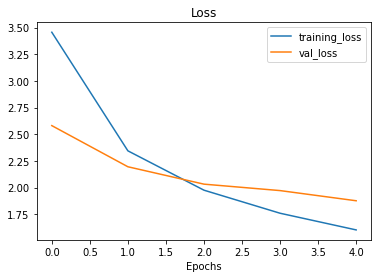

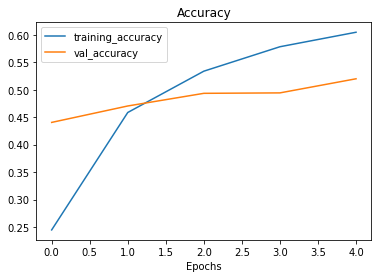

In [14]:
plot_loss_curves(history_all_classes_10_percent)

ü§î Soru: Bu eƒüriler ne √∂neriyor? ƒ∞pucu: ideal olarak, iki eƒüri birbirine √ßok benzer olmalƒ±dƒ±r.

## ƒ∞nce Ayar (Fine Tuning)

√ñzellik √ßƒ±karma transferi √∂ƒürenme modelimiz iyi performans g√∂steriyor. Neden temel modelde birka√ß katmanda ince ayar yapmaya √ßalƒ±≈ümƒ±yoruz ve herhangi bir iyile≈ütirme elde edip edemeyeceƒüimizi g√∂rm√ºyoruz?

ƒ∞yi haber ≈üu ki, `ModelCheckpoint` geri aramasƒ± sayesinde zaten iyi performans g√∂steren modelimizin kaydedilmi≈ü aƒüƒ±rlƒ±klarƒ±na sahibiz, b√∂ylece ince ayar herhangi bir fayda saƒülamƒ±yorsa geri d√∂nebiliriz.

Temel modelde ince ayar yapmak i√ßin √∂nce `trainable` √∂zniteliƒüini `True` olarak ayarlayacaƒüƒ±z, t√ºm donmu≈ülarƒ± √ß√∂zeceƒüiz.

Daha sonra, nispeten k√º√ß√ºk bir eƒüitim veri setimiz olduƒüu i√ßin, son 5 hari√ß her katmanƒ± yeniden donduracaƒüƒ±z ve onlarƒ± eƒüitilebilir hale getireceƒüiz.

In [16]:
# Temel modeldeki t√ºm katmanlarƒ± √ß√∂z
base_model.trainable = True

# Son 5 hari√ß her katmanƒ± yeniden dondur
for layer in base_model.layers[:-5]:
  layer.trainable = False

Modelimizdeki katmanlarda yeni bir deƒüi≈üiklik yaptƒ±k ve modelimizde her deƒüi≈üiklik yaptƒ±ƒüƒ±mƒ±zda ne yapmamƒ±z gerekiyor? (Yeniden derlemek :) )

ƒ∞nce ayar yaptƒ±ƒüƒ±mƒ±z i√ßin, √∂nceki eƒüitilmi≈ü aƒüƒ±rlƒ±klardaki g√ºncellemelerin √ßok b√ºy√ºk olmamasƒ±nƒ± saƒülamak i√ßin 10 kat daha d√º≈ü√ºk bir √∂ƒürenme oranƒ± kullanacaƒüƒ±z.

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4), # Varsayƒ±landan 10 kat daha d√º≈ü√ºk √∂ƒürenme oranƒ±
              metrics=['accuracy'])

Model yeniden derlendi, istediƒüimiz katmanlarƒ±n eƒüitilebilir olduƒüundan emin olmaya ne dersiniz?

In [19]:
for layer in model.layers:
  print(layer.name, layer.trainable)

input_layer True
data_augmentation True
efficientnetb0 True
global_average_pooling True
output_layer True


In [20]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

M√ºkemmel! Modelimize ince ayar yapma zamanƒ±.

Herhangi bir yararƒ±n olup olmadƒ±ƒüƒ±nƒ± g√∂rmek i√ßin 5 epoch daha yeterli olmalƒ±dƒ±r (ancak her zaman daha fazlasƒ±nƒ± deneyebiliriz).

`Fit()` i≈ülevindeki `initial_epoch` parametresini kullanarak √∂zellik √ßƒ±karma modelinin kaldƒ±ƒüƒ± yerden eƒüitime ba≈ülayacaƒüƒ±z.

In [21]:
fine_tune_epochs = 10

history_all_classes_10_percent_fine_tune = model.fit(train_data_all_10_percent,
                                                     epochs=fine_tune_epochs,
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)), 
                                                     initial_epoch=history_all_classes_10_percent.epoch[-1]) 

Epoch 5/10
237/237 [==============================] - 65s 246ms/step - loss: 1.3694 - accuracy: 0.6510 - val_loss: 1.9126 - val_accuracy: 0.5024
Epoch 6/10
237/237 [==============================] - 56s 233ms/step - loss: 1.2323 - accuracy: 0.6706 - val_loss: 1.9015 - val_accuracy: 0.5106
Epoch 7/10
237/237 [==============================] - 54s 228ms/step - loss: 1.1418 - accuracy: 0.6969 - val_loss: 1.9327 - val_accuracy: 0.5021
Epoch 8/10
237/237 [==============================] - 54s 226ms/step - loss: 1.0874 - accuracy: 0.7119 - val_loss: 1.9087 - val_accuracy: 0.5026
Epoch 9/10
237/237 [==============================] - 51s 214ms/step - loss: 1.0345 - accuracy: 0.7236 - val_loss: 1.8899 - val_accuracy: 0.5037
Epoch 10/10
237/237 [==============================] - 51s 215ms/step - loss: 0.9691 - accuracy: 0.7391 - val_loss: 1.8552 - val_accuracy: 0.5154


Bir kez daha, eƒüitim sƒ±rasƒ±nda test verilerinin sadece k√º√ß√ºk bir kƒ±smƒ±nƒ± deƒüerlendiriyorduk, modelimizin t√ºm test verileri √ºzerinde nasƒ±l gittiƒüini √∂ƒürenelim.

In [22]:
results_all_classes_10_percent_fine_tune = model.evaluate(test_data)
results_all_classes_10_percent_fine_tune

790/790 [==============================] - 90s 113ms/step - loss: 1.6013 - accuracy: 0.5789


[1.6013119220733643, 0.578930675983429]

Hmm... G√∂r√ºn√º≈üe g√∂re modelimiz ince ayardan biraz g√º√ß almƒ±≈ü.

`Compare_historys()` fonksiyonumuzu kullanarak ve eƒüitim eƒürilerinin ne s√∂ylediƒüini g√∂rerek daha iyi bir resim elde edebiliriz.

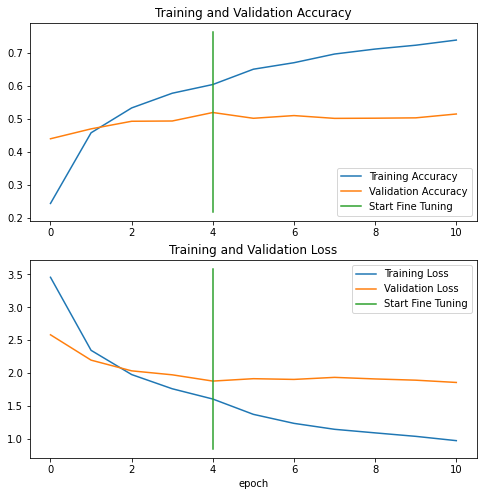

In [23]:
compare_historys(original_history=history_all_classes_10_percent,
                 new_history=history_all_classes_10_percent_fine_tune,
                 initial_epochs=5)

ƒ∞nce ayardan sonra modelimizin eƒüitim metrikleri √∂nemli √∂l√ß√ºde iyile≈üti, ancak doƒürulama √ßok fazla deƒüil. G√∂r√ºn√º≈üe g√∂re modelimiz overfitting oldu.

Yine de sorun deƒüil, √∂nceden eƒüitilmi≈ü bir modelin eƒüitildiƒüi veriler √∂zel verilerinize benzer olduƒüunda, ince ayarƒ±n fazla uydurmaya yol a√ßmasƒ± √ßok sƒ±k g√∂r√ºl√ºr.

Bizim durumumuzda, √∂nceden eƒüitilmi≈ü modelimiz EfficientNetB0, tƒ±pkƒ± gƒ±da veri setimiz gibi bir√ßok ger√ßek gƒ±da resmini i√ßeren ImageNet √ºzerinde eƒüitilmi≈ütir.

√ñzellik √ßƒ±karma zaten iyi √ßalƒ±≈üƒ±yorsa, ince ayardan g√∂rd√ºƒü√ºn√ºz iyile≈ütirmeler, veri k√ºmeniz, temel modelinizin √∂nceden eƒüitilmi≈ü olduƒüu verilerden √∂nemli √∂l√ß√ºde farklƒ±ymƒ±≈ü gibi b√ºy√ºk olmayabilir.

## Eƒüitilmi≈ü Modelimizi Kaydetme

Modelimizi sƒ±fƒ±rdan yeniden eƒüitmek zorunda kalmamak i√ßin `save()` y√∂ntemini kullanarak dosyaya kaydedelim.

In [ ]:
# model.save("drive/My Drive/")

## T√ºm Farklƒ± Sƒ±nƒ±flarda B√ºy√ºk Modelin Performansƒ±nƒ±n Deƒüerlendirilmesi

Kullandƒ±ƒüƒ±mƒ±z deƒüerlendirme √∂l√ß√ºtlerine g√∂re olduk√ßa iyi performans g√∂steren, eƒüitilmi≈ü ve kaydedilmi≈ü bir modelimiz var.

Ama metrik ≈üemalarƒ±, hadi modelimizin performansƒ±nƒ± biraz daha derinlemesine inceleyelim ve bazƒ± g√∂rselle≈ütirmeler yapalƒ±m.

Bunu yapmak i√ßin, kaydedilen modeli y√ºkleyeceƒüiz ve bunu test veri setinde bazƒ± tahminler yapmak i√ßin kullanacaƒüƒ±z.

> üîë Not: Bir makine √∂ƒürenimi modelini deƒüerlendirmek, eƒüitmek kadar √∂nemlidir. Metrikler aldatƒ±cƒ± olabilir. ƒ∞yi g√∂r√ºnen eƒüitim numaralarƒ±na aldanmadƒ±ƒüƒ±nƒ±zdan emin olmak i√ßin modelinizin performansƒ±nƒ± her zaman g√∂r√ºnmeyen veriler √ºzerinde g√∂rselle≈ütirmelisiniz.

In [ ]:
import tensorflow as tf

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip
saved_model_path = "06_101_food_class_10_percent_saved_big_dog_model.zip"
unzip_data(saved_model_path)

model = tf.keras.models.load_model(saved_model_path.split(".")[0]) 

Y√ºklenen modelimizin ger√ßekten eƒüitilmi≈ü bir model olduƒüundan emin olmak i√ßin, performansƒ±nƒ± test veri setinde deƒüerlendirelim.

In [25]:
loaded_loss, loaded_accuracy = model.evaluate(test_data)
loaded_loss, loaded_accuracy

790/790 [==============================] - 92s 115ms/step - loss: 1.8027 - accuracy: 0.6078


(1.8027206659317017, 0.6077623963356018)

Olaƒüan√ºst√º! Y√ºklenen modelimiz, kaydetmeden √∂nceki kadar iyi performans g√∂steriyor gibi g√∂r√ºn√ºyor. Bazƒ± tahminlerde bulunalƒ±m.

## Eƒüitimli Modelimiz ile Tahminler Yapmak

Eƒüitilmi≈ü modelimizi deƒüerlendirmek i√ßin, onunla bazƒ± tahminler yapmamƒ±z ve ardƒ±ndan bu tahminleri test veri seti ile kar≈üƒ±la≈ütƒ±rmamƒ±z gerekiyor.

Model, test veri setini hi√ß g√∂rmediƒüi i√ßin, bu bize modelin ger√ßek d√ºnyada eƒüitildiƒüi ≈üeye benzer veriler √ºzerinde nasƒ±l performans g√∂stereceƒüine dair bir g√∂sterge vermelidir.

Eƒüitilmi≈ü modelimiz ile tahminler yapmak i√ßin, test verilerini ge√ßerek `predict()` y√∂ntemini kullanabiliriz.

Verilerimiz √ßok sƒ±nƒ±flƒ± olduƒüundan, bunu yapmak muhtemelen her √∂rnek i√ßin bir tens√∂r tahmini d√∂nd√ºr√ºr.

Ba≈üka bir deyi≈üle, eƒüitilen model bir g√∂r√ºnt√ºy√º her g√∂rd√ºƒü√ºnde, onu eƒüitim sƒ±rasƒ±nda √∂ƒürendiƒüi t√ºm kalƒ±plarla kar≈üƒ±la≈ütƒ±racak ve g√∂r√ºnt√ºn√ºn o sƒ±nƒ±f olma olasƒ±lƒ±ƒüƒ±nƒ±n her sƒ±nƒ±f (101'inin t√ºm√º) i√ßin bir √ßƒ±ktƒ± d√∂nd√ºrecektir.

In [26]:
pred_probs = model.predict(test_data, verbose=1)

790/790 [==============================] - 64s 79ms/step


T√ºm test g√∂r√ºnt√ºlerini modelimize ilettik ve her birinde hangi gƒ±da olduƒüunu d√º≈ü√ºnd√ºƒü√º hakkƒ±nda bir tahminde bulunmasƒ±nƒ± istedik.

Yani test veri setinde 25250 g√∂rselimiz olsaydƒ±, sizce ka√ß tahminimiz olmalƒ±?


In [27]:
len(pred_probs)

25250

Ve her g√∂r√ºnt√º 101 sƒ±nƒ±ftan biri olabilseydi, her g√∂r√ºnt√º i√ßin ka√ß tahminimiz olacaƒüƒ±nƒ± d√º≈ü√ºn√ºyorsunuz?

In [28]:
pred_probs.shape

(25250, 101)

Sahip olduƒüumuz ≈üeye genellikle bir tahmin olasƒ±lƒ±k tens√∂r√º (veya dizi) denir.

Bakalƒ±m ilk 10 nasƒ±l g√∂r√ºn√ºyor.

In [29]:
pred_probs[:10]

array([[5.95420077e-02, 3.57419503e-06, 4.13768589e-02, ...,
        1.41386813e-09, 8.35307583e-05, 3.08974274e-03],
       [9.64016676e-01, 1.37532707e-09, 8.47805641e-04, ...,
        5.42872003e-05, 7.83623513e-12, 9.84663906e-10],
       [9.59258676e-01, 3.25335823e-05, 1.48669467e-03, ...,
        7.18913384e-07, 5.43973158e-07, 4.02759651e-05],
       ...,
       [4.73132670e-01, 1.29312355e-07, 1.48055656e-03, ...,
        5.97501639e-04, 6.69690999e-05, 2.34693434e-05],
       [4.45719399e-02, 4.72655188e-07, 1.22585356e-01, ...,
        6.34984963e-06, 7.53185031e-06, 3.67787597e-03],
       [7.24390090e-01, 1.92497107e-09, 5.23109738e-05, ...,
        1.22913450e-03, 1.57926350e-09, 9.63957209e-05]], dtype=float32)

Pekala, elimizde ger√ßekten √ßok k√º√ß√ºk sayƒ±lar olan bir grup tens√∂r var gibi g√∂r√ºn√ºyor, bunlardan birini yakƒ±nla≈ütƒ±rmaya ne dersiniz?

In [30]:
print(f"Number of prediction probabilities for sample 0: {len(pred_probs[0])}")
print(f"What prediction probability sample 0 looks like:\n {pred_probs[0]}")
print(f"The class with the highest predicted probability by the model for sample 0: {pred_probs[0].argmax()}")

Number of prediction probabilities for sample 0: 101
What prediction probability sample 0 looks like:
 [5.9542008e-02 3.5741950e-06 4.1376859e-02 1.0660556e-09 8.1613978e-09
 8.6639664e-09 8.0926822e-07 8.5652499e-07 1.9859017e-05 8.0977776e-07
 3.1727747e-09 9.8673661e-07 2.8532164e-04 7.8049051e-10 7.4230169e-04
 3.8916416e-05 6.4740193e-06 2.4977280e-06 3.7891099e-05 2.0678388e-07
 1.5538422e-05 8.1506943e-07 2.6230446e-06 2.0010630e-07 8.3827456e-07
 5.4215989e-06 3.7390860e-06 1.3150533e-08 2.7761406e-03 2.8051838e-05
 6.8562162e-10 2.5574835e-05 1.6688865e-04 7.6407297e-10 4.0452729e-04
 1.3150634e-08 1.7957379e-06 1.4448218e-06 2.3062859e-02 8.2466784e-07
 8.5365781e-07 1.7138614e-06 7.0525107e-06 1.8402169e-08 2.8553407e-07
 7.9483234e-06 2.0681514e-06 1.8525066e-07 3.3619774e-08 3.1522498e-04
 1.0410913e-05 8.5448539e-07 8.4741873e-01 1.0555415e-05 4.4094671e-07
 3.7404148e-05 3.5306231e-05 3.2489133e-05 6.7314817e-05 1.2852616e-08
 2.6219660e-10 1.0318080e-05 8.5744046e-05 1.

Daha √∂nce tartƒ±≈ütƒ±ƒüƒ±mƒ±z gibi, modelimize ge√ßtiƒüimiz her g√∂r√ºnt√º tens√∂r√º i√ßin, √ßƒ±ktƒ± n√∂ronlarƒ±nƒ±n sayƒ±sƒ± ve son katmandaki aktivasyon fonksiyonu nedeniyle (`layers.Dense(len(train_data_all_10_percent.class_names), activation="softmax"`) √ßƒ±ktƒ± verir. 101 sƒ±nƒ±fƒ±n her biri i√ßin 0 ile 1 arasƒ±nda bir tahmin olasƒ±lƒ±ƒüƒ± vardƒ±r.

Ve en y√ºksek tahmin olasƒ±lƒ±ƒüƒ±nƒ±n endeksi, modelin en olasƒ± etiket olduƒüunu d√º≈ü√ºnd√ºƒü√º ≈üey olarak d√º≈ü√ºn√ºlebilir. Benzer ≈üekilde, tahmin olasƒ±lƒ±k deƒüeri ne kadar d√º≈ü√ºkse, model hedef g√∂r√ºnt√ºn√ºn o belirli sƒ±nƒ±f olduƒüunu o kadar az d√º≈ü√ºn√ºr.

üîë Not: Softmax aktivasyon fonksiyonunun doƒüasƒ± gereƒüi, tek bir √∂rnek i√ßin tahmin olasƒ±lƒ±klarƒ±nƒ±n her birinin toplamƒ± 1 (veya en azƒ±ndan 1'e √ßok yakƒ±n) olacaktƒ±r. √ñrneƒüin. pred_probs[0].sum() = 1.

`argmax()` y√∂ntemini kullanarak her tahmin olasƒ±lƒ±k tens√∂r√ºndeki maksimum deƒüerin indeksini bulabiliriz.

In [31]:
pred_classes = pred_probs.argmax(axis=1)
pred_classes[:10]

array([52,  0,  0, 80, 79, 61, 29,  0, 85,  0])

G√ºzel! Artƒ±k test veri k√ºmemizdeki √∂rneklerin her biri i√ßin tahmin edilen sƒ±nƒ±f indeksine sahibiz.

Modelimizi daha fazla deƒüerlendirmek i√ßin bunlarƒ± test veri k√ºmesi etiketleriyle kar≈üƒ±la≈ütƒ±rabileceƒüiz.

Test veri k√ºmesi etiketlerini almak i√ßin `unbatch()` y√∂ntemini kullanarak `test_data` nesnemizi (bir `tf.data.Dataset` bi√ßimindedir) √ß√∂zebiliriz.

Bunu yapmak, test veri setindeki resimlere ve etiketlere eri≈ümemizi saƒülayacaktƒ±r. Etiketler tek sƒ±cak (hot-encoding) kodlanmƒ±≈ü bi√ßimde olduƒüundan, etiketin dizinini d√∂nd√ºrmek i√ßin `argmax()` y√∂ntemini kullanacaƒüƒ±z.

> üîë Not: Bu √ß√∂z√ºlme, test verisi nesnesini olu≈ütururken `shuffle=False` yapmamƒ±zƒ±n nedenidir. Aksi takdirde, test veri setini her y√ºklediƒüimizde (tahmin yaparken olduƒüu gibi), her seferinde karƒ±≈ütƒ±rƒ±lacaktƒ±, yani tahminlerimizi etiketlerle kar≈üƒ±la≈ütƒ±rmaya √ßalƒ±≈üsaydƒ±k, farklƒ± sƒ±rada olacaklardƒ±.

In [32]:
y_labels = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())
y_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

G√ºzel! `test_data` karƒ±≈ütƒ±rƒ±lmadƒ±ƒüƒ±ndan, `y_labels` dizisi, `pred_classes` dizisiyle aynƒ± sƒ±rada geri gelir.

Son kontrol, ka√ß etiketimiz olduƒüunu g√∂rmek.

In [33]:
len(y_labels)

25250

Beklendiƒüi gibi, etiket sayƒ±sƒ± elimizdeki g√∂r√ºnt√º sayƒ±sƒ±yla e≈üle≈üiyor. Modelimizin tahminlerini temel ger√ßek etiketleriyle kar≈üƒ±la≈ütƒ±rma zamanƒ±.

## Model Tahminlerimizi Deƒüerlendirme

√áok basit bir deƒüerlendirme, doƒüruluk etiketlerini tahmin edilen etiketlerle kar≈üƒ±la≈ütƒ±ran ve bir doƒüruluk puanƒ± d√∂nd√ºren Scikit-Learn'√ºn `accuracy_score()` i≈ülevini kullanmaktƒ±r.

`y_labels` ve `pred_classes` dizilerimizi doƒüru bir ≈üekilde olu≈üturduysak, bu, daha √∂nce kullandƒ±ƒüƒ±mƒ±z `evaluate()` y√∂ntemiyle aynƒ± doƒüruluk deƒüerini (veya en azƒ±ndan √ßok yakƒ±n) d√∂nd√ºrmelidir.

In [34]:
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_labels, pred_classes)
sklearn_accuracy

0.6077623762376237

In [35]:
import numpy as np
print(f"Close? {np.isclose(loaded_accuracy, sklearn_accuracy)} | Difference: {loaded_accuracy - sklearn_accuracy}")

Close? True | Difference: 2.0097978059574473e-08


Tamam, `pred_classes` dizimiz ve `y_labels` dizilerimiz doƒüru sƒ±rada g√∂r√ºn√ºyor.

Karƒ±≈üƒ±klƒ±k matrisi ile biraz daha g√∂rsellik katmaya ne dersiniz?

Bunu yapmak i√ßin, √∂nceki bir not defterinde olu≈üturduƒüumuz `make_confusion_matrix` i≈ülevimizi kullanacaƒüƒ±z.

≈ûu anda tahminlerimiz ve doƒüruluk etiketlerimiz tamsayƒ±lar bi√ßimindedir, ancak ger√ßek adlarƒ±nƒ± alƒ±rsak anlamak √ßok daha kolay olacaktƒ±r. Bunu, `test_data` nesnemizde `class_names` niteliƒüini kullanarak yapabiliriz.


In [37]:
class_names = test_data.class_names
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

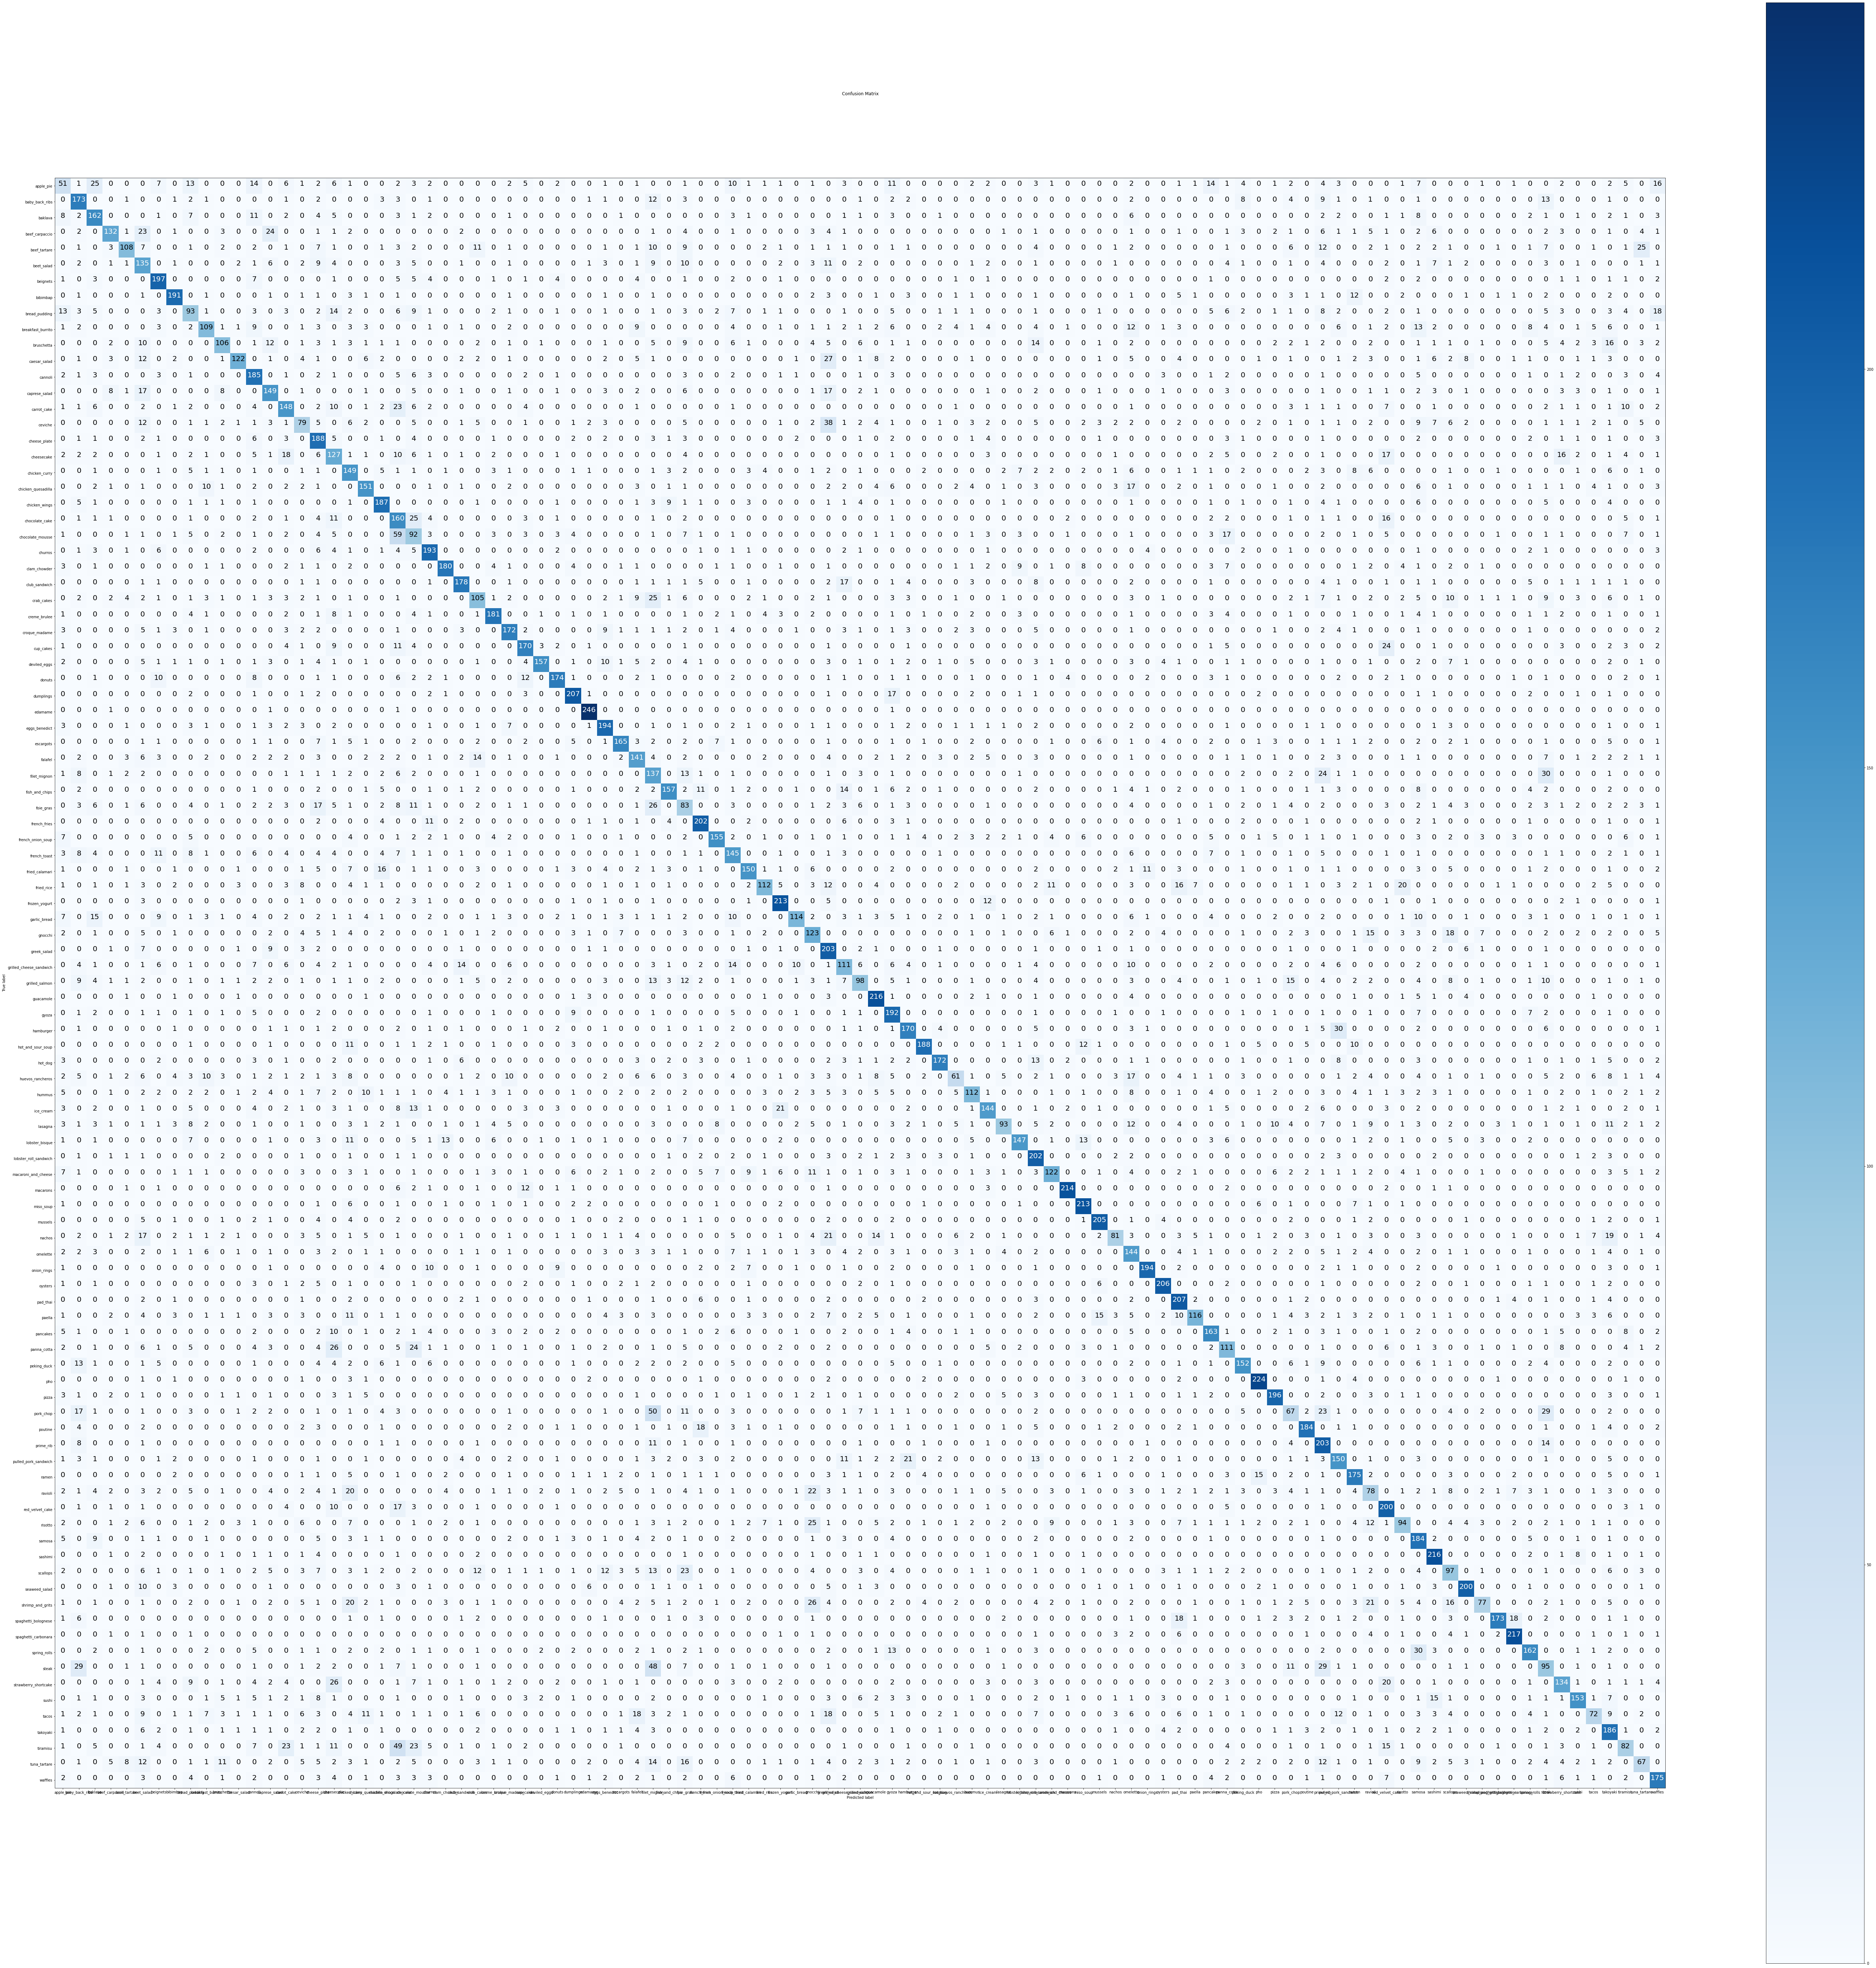

In [38]:
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100, 100),
                      text_size=20,
                      norm=False,
                      savefig=True)

Vay! ≈ûimdi bu b√ºy√ºk bir karƒ±≈üƒ±klƒ±k matrisi. ƒ∞lk ba≈üta biraz √ºrk√ºt√ºc√º g√∂r√ºnebilir ama biraz yakƒ±nla≈ütƒ±rdƒ±ktan sonra, hangi sƒ±nƒ±flarƒ±n "kafasƒ±nƒ±n karƒ±≈ütƒ±ƒüƒ±" konusunda bize nasƒ±l fikir verdiƒüini g√∂rebiliriz.

ƒ∞yi haber ≈üu ki, tahminlerin √ßoƒüu sol √ºstten saƒü alt k√∂≈üeye doƒüru, yani doƒürular.

Modelin kafasƒ± en √ßok, pig_chop √∂rnekleri i√ßin filet_mignon ve tiramisu √∂rnekleri i√ßin Chocolate_cake gibi g√∂rsel olarak benzer g√∂r√ºnen sƒ±nƒ±flarda karƒ±≈üƒ±yor gibi g√∂r√ºn√ºyor.

Bir sƒ±nƒ±flandƒ±rma problemi √ºzerinde √ßalƒ±≈ütƒ±ƒüƒ±mƒ±z i√ßin, Scikit-Learn'in `classification_report()` i≈ülevini kullanarak modelimizin tahminlerini daha da deƒüerlendirebiliriz.


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_labels, pred_classes))

              precision    recall  f1-score   support

           0       0.29      0.20      0.24       250
           1       0.51      0.69      0.59       250
           2       0.56      0.65      0.60       250
           3       0.74      0.53      0.62       250
           4       0.73      0.43      0.54       250
           5       0.34      0.54      0.42       250
           6       0.67      0.79      0.72       250
           7       0.82      0.76      0.79       250
           8       0.40      0.37      0.39       250
           9       0.62      0.44      0.51       250
          10       0.62      0.42      0.50       250
          11       0.84      0.49      0.62       250
          12       0.52      0.74      0.61       250
          13       0.56      0.60      0.58       250
          14       0.56      0.59      0.57       250
          15       0.44      0.32      0.37       250
          16       0.45      0.75      0.57       250
          17       0.37    

`classification_report()`, sƒ±nƒ±f ba≈üƒ±na kesinlik, geri √ßaƒüƒ±rma ve f1-skorunun √ßƒ±ktƒ±sƒ±nƒ± verir.

Bir hatƒ±rlatƒ±cƒ±:

- **Precision** - Ger√ßek pozitiflerin toplam numune sayƒ±sƒ±na oranƒ±. Daha y√ºksek hassasiyet, daha az yanlƒ±≈ü pozitife yol a√ßar (model 0 olmasƒ± gerektiƒüinde 1'i tahmin eder).
- **Recall** - Ger√ßek pozitiflerin toplam ger√ßek pozitif ve yanlƒ±≈ü negatif sayƒ±sƒ±na oranƒ± (model, 1 olmasƒ± gerektiƒüinde 0'ƒ± tahmin eder). Daha y√ºksek hatƒ±rlama, daha az yanlƒ±≈ü negatife yol a√ßar.
- **F1 Score **- Kesinlik ve hatƒ±rlamayƒ± tek bir metrikte birle≈ütirir. 1 en iyisidir, 0 en k√∂t√ºs√ºd√ºr.

Yukarƒ±daki √ßƒ±ktƒ± yardƒ±mcƒ± olur, ancak bu kadar √ßok sƒ±nƒ±fla anla≈üƒ±lmasƒ± biraz zor.

Bir g√∂rselle≈ütirme yardƒ±mƒ±yla bunu kolayla≈ütƒ±rƒ±p kolayla≈ütƒ±rmayacaƒüƒ±mƒ±za bakalƒ±m.

ƒ∞lk olarak, `output_dict=True` ayarƒ±nƒ± yaparak `classification_report()` √ßƒ±ktƒ±sƒ±nƒ± s√∂zl√ºk olarak alacaƒüƒ±z.

In [40]:
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

{'0': {'f1-score': 0.24056603773584903,
  'precision': 0.29310344827586204,
  'recall': 0.204,
  'support': 250},
 '1': {'f1-score': 0.5864406779661017,
  'precision': 0.5088235294117647,
  'recall': 0.692,
  'support': 250},
 '10': {'f1-score': 0.5047619047619047,
  'precision': 0.6235294117647059,
  'recall': 0.424,
  'support': 250},
 '100': {'f1-score': 0.641025641025641,
  'precision': 0.5912162162162162,
  'recall': 0.7,
  'support': 250},
 '11': {'f1-score': 0.6161616161616161,
  'precision': 0.8356164383561644,
  'recall': 0.488,
  'support': 250},
 '12': {'f1-score': 0.6105610561056106,
  'precision': 0.5196629213483146,
  'recall': 0.74,
  'support': 250},
 '13': {'f1-score': 0.5775193798449612,
  'precision': 0.5601503759398496,
  'recall': 0.596,
  'support': 250},
 '14': {'f1-score': 0.574757281553398,
  'precision': 0.5584905660377358,
  'recall': 0.592,
  'support': 250},
 '15': {'f1-score': 0.36744186046511623,
  'precision': 0.4388888888888889,
  'recall': 0.316,
  'su

Pekala, burada hala birka√ß deƒüer var, biraz daraltmaya ne dersiniz?

f1-skoru, recall ve precission tek bir metrikte birle≈ütirdiƒüinden, buna odaklanalƒ±m.

Bunu ayƒ±klamak i√ßin `class_f1_scores` adƒ±nda bo≈ü bir s√∂zl√ºk olu≈üturacaƒüƒ±z ve ardƒ±ndan sƒ±nƒ±f adƒ±nƒ± ve `f1-score`'u anahtar olarak, class_f1_scores i√ßindeki deƒüer √ßiftlerini ekleyerek `classification_report_dict` i√ßindeki her √∂ƒüe arasƒ±nda dola≈üacaƒüƒ±z.


In [41]:
class_f1_scores = {}
for k, v in classification_report_dict.items():
  if k == "accuracy":
    break
  else:
    class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'apple_pie': 0.24056603773584903,
 'baby_back_ribs': 0.5864406779661017,
 'baklava': 0.6022304832713754,
 'beef_carpaccio': 0.616822429906542,
 'beef_tartare': 0.544080604534005,
 'beet_salad': 0.41860465116279066,
 'beignets': 0.7229357798165138,
 'bibimbap': 0.7908902691511386,
 'bread_pudding': 0.3866943866943867,
 'breakfast_burrito': 0.5117370892018779,
 'bruschetta': 0.5047619047619047,
 'caesar_salad': 0.6161616161616161,
 'cannoli': 0.6105610561056106,
 'caprese_salad': 0.5775193798449612,
 'carrot_cake': 0.574757281553398,
 'ceviche': 0.36744186046511623,
 'cheese_plate': 0.5654135338345864,
 'cheesecake': 0.42546063651591287,
 'chicken_curry': 0.5008403361344538,
 'chicken_quesadilla': 0.6411889596602972,
 'chicken_wings': 0.7123809523809523,
 'chocolate_cake': 0.45261669024045265,
 'chocolate_mousse': 0.3291592128801431,
 'churros': 0.7134935304990757,
 'clam_chowder': 0.7708779443254817,
 'club_sandwich': 0.734020618556701,
 'crab_cakes': 0.4625550660792952,
 'creme_brulee

ƒ∞yi g√∂r√ºn√ºyor!

G√∂r√ºn√º≈üe g√∂re s√∂zl√ºƒü√ºm√ºz sƒ±nƒ±f isimlerine g√∂re sƒ±ralanmƒ±≈ü. Ancak, farklƒ± puanlarƒ± g√∂rselle≈ütirmeye √ßalƒ±≈üƒ±yorsak, bir t√ºr d√ºzende olmalarƒ± daha ho≈ü g√∂r√ºnebilir.

class_f1_scores s√∂zl√ºƒü√ºm√ºz√º bir panda DataFrame'e d√∂n√º≈üt√ºrelim ve artan bi√ßimde sƒ±ralayalƒ±m mƒ±?


In [42]:
import pandas as pd
f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores

class_name  f1-score
33              edamame  0.937143
63             macarons  0.895397
75                  pho  0.866538
91  spaghetti_carbonara  0.847656
69              oysters  0.834008
..                  ...       ...
56     huevos_rancheros  0.339833
22     chocolate_mousse  0.329159
77            pork_chop  0.308756
39            foie_gras  0.297491
0             apple_pie  0.240566

[101 rows x 2 columns]

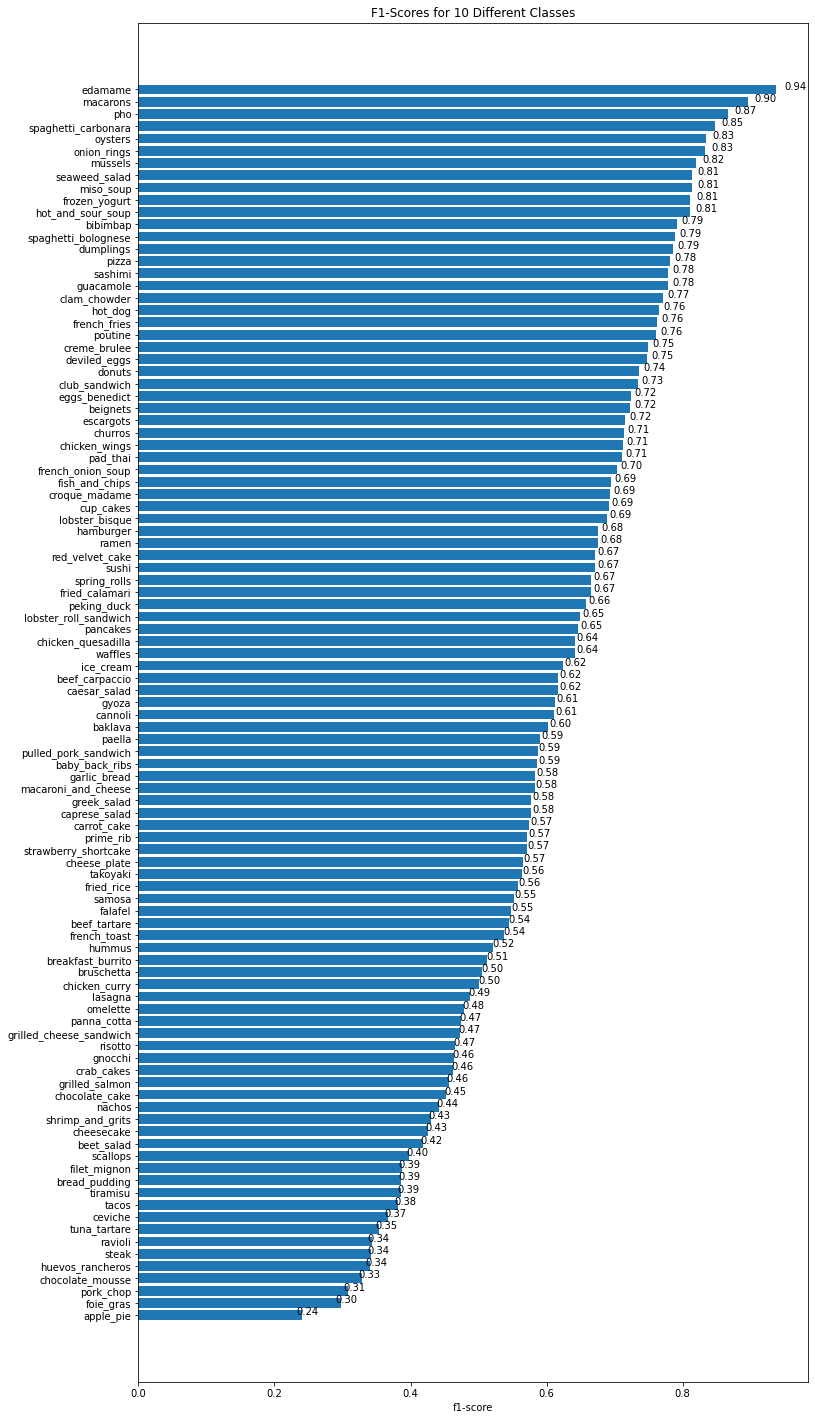

In [44]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 10 Different Classes")
ax.invert_yaxis();

def autolabel(rects): 
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)

≈ûimdi bu iyi g√∂r√ºnen bir grafik! Yani, metin konumlandƒ±rma biraz geli≈ütirilebilir ama ≈üimdilik idare eder.

Modelimizin tahminlerini g√∂rselle≈ütirmenin bize performansƒ±na dair tamamen yeni bir fikir verdiƒüini g√∂rebiliyor musunuz?

Birka√ß dakika √∂nce yalnƒ±zca bir doƒüruluk puanƒ±mƒ±z vardƒ±, ancak ≈üimdi modelimizin sƒ±nƒ±f bazƒ±nda ne kadar iyi performans g√∂sterdiƒüinin bir g√∂stergesine sahibiz.

G√∂r√ºn√º≈üe g√∂re modelimiz apple_pie ve ravioli gibi sƒ±nƒ±flarda olduk√ßa d√º≈ü√ºk performans g√∂sterirken, edamame ve pho gibi sƒ±nƒ±flar i√ßin performans olduk√ßa y√ºksek.

Bunun gibi bulgular bize deneylerimizde nereye gidebileceƒüimize dair ipu√ßlarƒ± veriyor. Belki de k√∂t√º performans g√∂steren sƒ±nƒ±flar hakkƒ±nda daha fazla veri toplamamƒ±z gerekebilir veya belki de en k√∂t√º performans g√∂steren sƒ±nƒ±flar hakkƒ±nda tahminde bulunmak zordur.

## Test G√∂r√ºnt√ºlerinde Tahminleri G√∂rselle≈ütirme

Ger√ßek test zamanƒ±. Tahminleri ger√ßek g√∂r√ºnt√ºler √ºzerinde g√∂rselle≈ütirme. ƒ∞stediƒüiniz t√ºm metriklere bakabilirsiniz, ancak bazƒ± tahminleri g√∂rselle≈ütirene kadar modelinizin nasƒ±l performans g√∂sterdiƒüini ger√ßekten bilemezsiniz.

Halihazƒ±rda, modelimiz se√ßtiƒüimiz herhangi bir g√∂r√ºnt√º √ºzerinde tahminde bulunamaz. G√∂r√ºnt√º √∂nce bir tens√∂re y√ºklenmelidir.

Bu nedenle, herhangi bir g√∂r√ºnt√º √ºzerinde tahminde bulunmaya ba≈ülamak i√ßin, bir g√∂r√ºnt√ºy√º bir tens√∂re y√ºklemek i√ßin bir fonksiyon olu≈üturacaƒüƒ±z.

Spesifik olarak:

- `tf.io.read_file(`) kullanarak bir hedef g√∂r√ºnt√º dosya yolunu okuyun.
- `tf.io.decode_image()` kullanarak g√∂r√ºnt√ºy√º bir Tens√∂re d√∂n√º≈üt√ºr√ºn.
- G√∂r√ºnt√ºy√º, `tf.image.resize()` kullanarak modelimizin √ºzerinde √ßalƒ±≈ütƒ±ƒüƒ± (224 x 224) g√∂r√ºnt√ºlerle aynƒ± boyutta olacak ≈üekilde yeniden boyutlandƒ±rƒ±n.
- Gerekirse 0 ve 1 arasƒ±ndaki t√ºm piksel deƒüerlerini elde etmek i√ßin g√∂r√ºnt√ºy√º √∂l√ßeklendirin.

In [45]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  img = tf.io.read_file(filename)
  img = tf.io.decode_image(img)
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    return img/255.
  else:
    return img

G√∂r√ºnt√º y√ºkleme ve √∂n i≈üleme i≈ülevi hazƒ±r.

≈ûimdi bir kod yazalƒ±m:

Test veri k√ºmesinden birka√ß rastgele g√∂r√ºnt√º y√ºkleyin.
Onlarla ilgili tahminlerde bulunun.
Modelin tahmin edilen etiketi, tahmin olasƒ±lƒ±ƒüƒ± ve kesin doƒüruluk etiketi ile birlikte orijinal g√∂r√ºnt√ºleri √ßizin.

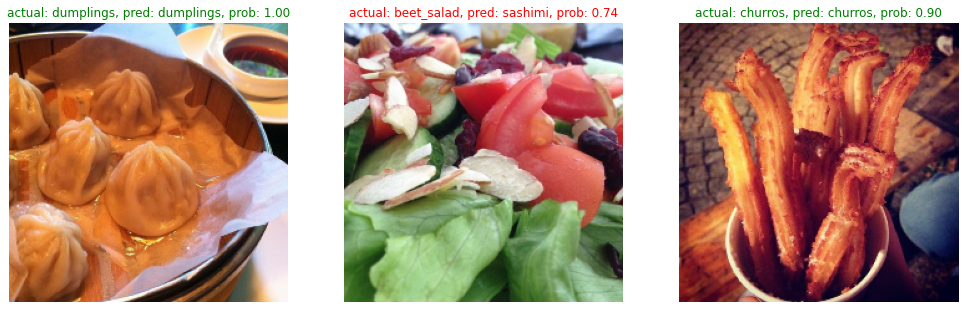

In [46]:
import os
import random

plt.figure(figsize=(17, 10))
for i in range(3):
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name + "/" + filename

  img = load_and_prep_image(filepath, scale=False) 
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) 
  pred_class = class_names[pred_prob.argmax()] 

  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class:
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);

Yeterince rastgele √∂rneklemden ge√ßtikten sonra, modelin g√∂rsel olarak benzer sƒ±nƒ±flarda, baby_back_ribs'in biftekle karƒ±≈ütƒ±rƒ±lmasƒ± ve bunun tersi gibi √ßok daha k√∂t√º tahminler yapma eƒüiliminde olduƒüu netlik kazanmaya ba≈ülar.

## En Yanlƒ±≈ü Tahminleri Bulma

Nasƒ±l √ßalƒ±≈ütƒ±ƒüƒ±na dair iyi bir fikir edinmek i√ßin modelinizin tahminlerinin en az 100'den fazla rastgele √∂rneƒüini g√∂zden ge√ßirmek iyi bir fikirdir.

Bir s√ºre sonra, modelin bazƒ± g√∂r√ºnt√ºlerde √ßok y√ºksek tahmin olasƒ±lƒ±ƒüƒ± ile tahmin yaptƒ±ƒüƒ±nƒ± fark edebilirsiniz, yani tahmininden √ßok emin ama yine de etiketi yanlƒ±≈ü anlƒ±yor.

Bu en yanlƒ±≈ü tahminler, modelinizin performansƒ± hakkƒ±nda daha fazla bilgi edinmenize yardƒ±mcƒ± olabilir.

√ñyleyse, modelin bir g√∂r√ºnt√º i√ßin y√ºksek bir tahmin olasƒ±lƒ±ƒüƒ± verdiƒüi (√∂rneƒüin 0.95+) ancak tahmini yanlƒ±≈ü yaptƒ±ƒüƒ± t√ºm tahminleri toplamak i√ßin bir kod yazalƒ±m.

A≈üaƒüƒ±daki adƒ±mlardan ge√ßeceƒüiz:

1. `list_files()` y√∂ntemini kullanarak test veri k√ºmesindeki t√ºm g√∂r√ºnt√º dosyasƒ± yollarƒ±nƒ± alƒ±n.
2. G√∂r√ºnt√º dosya yollarƒ±nƒ±n, kesin doƒüruluk etiketlerinin, tahmin sƒ±nƒ±flarƒ±nƒ±n, maksimum tahmin olasƒ±lƒ±klarƒ±nƒ±n, kesin ger√ßek sƒ±nƒ±f adlarƒ±nƒ±n ve tahmin edilen sƒ±nƒ±f adlarƒ±nƒ±n pandas DataFrame'ini olu≈üturun.
  - **Not:** Mutlaka b√∂yle bir DataFrame olu≈üturmamƒ±z gerekmez, ancak bu, ilerledik√ße i≈üleri g√∂rselle≈ütirmemize yardƒ±mcƒ± olur.
3. T√ºm yanlƒ±≈ü tahminleri bulmak i√ßin DataFrame'imizi kullanƒ±n (temel ger√ßeƒüin tahminle e≈üle≈ümediƒüi durumlarda).
4. DataFrame'i yanlƒ±≈ü tahminlere ve en y√ºksek maksimum tahmin olasƒ±lƒ±klarƒ±na g√∂re sƒ±ralayƒ±n.
5. G√∂r√ºnt√ºleri en y√ºksek tahmin olasƒ±lƒ±klarƒ± ile g√∂rselle≈ütirin, ancak yanlƒ±≈ü tahmine sahip olun.

In [47]:
# 1.adƒ±m
filepaths = []
for filepath in test_data.list_files("101_food_classes_10_percent/test/*/*.jpg", 
                                     shuffle=False):
  filepaths.append(filepath.numpy())
filepaths[:10]

[b'101_food_classes_10_percent/test/apple_pie/1011328.jpg',
 b'101_food_classes_10_percent/test/apple_pie/101251.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1034399.jpg',
 b'101_food_classes_10_percent/test/apple_pie/103801.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1038694.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1047447.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1068632.jpg',
 b'101_food_classes_10_percent/test/apple_pie/110043.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1106961.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1113017.jpg']

≈ûimdi t√ºm test g√∂r√ºnt√º dosya yollarƒ±na sahibiz, bunlarƒ± a≈üaƒüƒ±dakilerle birlikte bir DataFrame'de birle≈ütirelim:

- Temel doƒüruluk etiketleri (y_labels).
- Modelin √∂ng√∂rd√ºƒü√º sƒ±nƒ±f (pred_classes).
- Maksimum tahmin olasƒ±lƒ±k deƒüeri (pred_probs.max(axis=1)).
- Temel doƒüruluk sƒ±nƒ±fƒ± adlarƒ±.
- √ñng√∂r√ºlen sƒ±nƒ±f adlarƒ±.



In [50]:
# 2.adƒ±m
import pandas as pd
pred_df = pd.DataFrame({"img_path": filepaths,
                        "y_true": y_labels,
                        "y_pred": pred_classes,
                        "pred_conf": pred_probs.max(axis=1),
                        "y_true_classname": [class_names[i] for i in y_labels],
                        "y_pred_classname": [class_names[i] for i in pred_classes]}) 
pred_df.head()

img_path  ...      y_pred_classname
0  b'101_food_classes_10_percent/test/apple_pie/1...  ...                 gyoza
1  b'101_food_classes_10_percent/test/apple_pie/1...  ...             apple_pie
2  b'101_food_classes_10_percent/test/apple_pie/1...  ...             apple_pie
3  b'101_food_classes_10_percent/test/apple_pie/1...  ...  pulled_pork_sandwich
4  b'101_food_classes_10_percent/test/apple_pie/1...  ...             prime_rib

[5 rows x 6 columns]

G√ºzel! Tahminin doƒüru mu yanlƒ±≈ü mƒ± olduƒüunu bize anlatan basit bir s√ºtun yapmaya ne dersiniz?

In [51]:
# 3.adƒ±m
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]
pred_df.head()

img_path  ...  pred_correct
0  b'101_food_classes_10_percent/test/apple_pie/1...  ...         False
1  b'101_food_classes_10_percent/test/apple_pie/1...  ...          True
2  b'101_food_classes_10_percent/test/apple_pie/1...  ...          True
3  b'101_food_classes_10_percent/test/apple_pie/1...  ...         False
4  b'101_food_classes_10_percent/test/apple_pie/1...  ...         False

[5 rows x 7 columns]

Ve ≈üimdi hangi tahminlerin doƒüru veya yanlƒ±≈ü olduƒüunu ve tahmin olasƒ±lƒ±klarƒ±yla birlikte bildiƒüimize g√∂re, yanlƒ±≈ü tahminleri sƒ±ralayarak ve tahmin olasƒ±lƒ±klarƒ±nƒ± azaltarak "en yanlƒ±≈ü" 100 tahmini elde etmeye ne dersiniz?

In [52]:
# 4.adƒ±m
top_100_wrong = pred_df[pred_df["pred_correct"] == False].sort_values("pred_conf", ascending=False)[:100]
top_100_wrong.head(20)

img_path  ...  pred_correct
21810  b'101_food_classes_10_percent/test/scallops/17...  ...         False
231    b'101_food_classes_10_percent/test/apple_pie/8...  ...         False
15359  b'101_food_classes_10_percent/test/lobster_rol...  ...         False
23539  b'101_food_classes_10_percent/test/strawberry_...  ...         False
21400  b'101_food_classes_10_percent/test/samosa/3140...  ...         False
24540  b'101_food_classes_10_percent/test/tiramisu/16...  ...         False
2511   b'101_food_classes_10_percent/test/bruschetta/...  ...         False
5574   b'101_food_classes_10_percent/test/chocolate_m...  ...         False
17855  b'101_food_classes_10_percent/test/paella/2314...  ...         False
23797  b'101_food_classes_10_percent/test/sushi/16593...  ...         False
18001  b'101_food_classes_10_percent/test/pancakes/10...  ...         False
11642  b'101_food_classes_10_percent/test/garlic_brea...  ...         False
10847  b'101_food_classes_10_percent/test/fried_calam...  ...         False
23631  b'101_food_classes_10_percent/test/strawberry_...  ...         False
1155   b'101_food_classes_10_percent/test/beef_tartar...  ...         False
10854  b'101_food_classes_10_percent/test/fried_calam...  ...         False
23904  b'101_food_classes_10_percent/test/sushi/33652...  ...         False
7316   b'101_food_classes_10_percent/test/cup_cakes/1...  ...         False
13144  b'101_food_classes_10_percent/test/gyoza/31214...  ...         False
10880  b'101_food_classes_10_percent/test/fried_calam...  ...         False

[20 rows x 7 columns]

√áok ilgin√ß... sadece temel doƒüruluk sƒ±nƒ±f adƒ± (y_true_classname) ve tahmin sƒ±nƒ±f adƒ± s√ºtununu (y_pred_classname) kar≈üƒ±la≈ütƒ±rarak herhangi bir eƒüilim fark ettiniz mi?

Onlarƒ± g√∂rselle≈ütirirsek daha kolay olabilir.

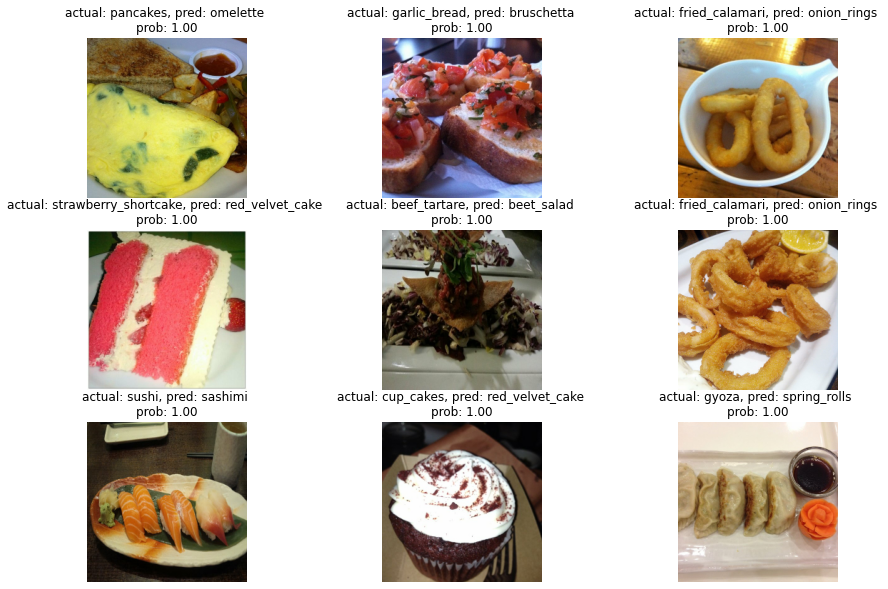

In [53]:
images_to_view = 9
start_index = 10 
plt.figure(figsize=(15, 10))
for i, row in enumerate(top_100_wrong[start_index:start_index+images_to_view].itertuples()): 
  plt.subplot(3, 3, i+1)
  img = load_and_prep_image(row[1], scale=True)
  _, _, _, _, pred_prob, y_true, y_pred, _ = row 
  plt.imshow(img)
  plt.title(f"actual: {y_true}, pred: {y_pred} \nprob: {pred_prob:.2f}")
  plt.axis(False)

Modelin en yanlƒ±≈ü tahminlerini incelemek genellikle birka√ß ≈üeyi anlamaya yardƒ±mcƒ± olabilir:

- Bazƒ± etiketler yanlƒ±≈ü olabilir - Modelimiz yeterince iyi olursa, aslƒ±nda belirli sƒ±nƒ±flarda √ßok iyi tahmin yapmayƒ± √∂ƒürenebilir. Bu, modelin doƒüru etiketi √∂ng√∂rd√ºƒü√º bazƒ± g√∂r√ºnt√ºlerin, temel doƒüruluk etiketinin yanlƒ±≈ü olmasƒ± durumunda yanlƒ±≈ü olarak g√∂sterilebileceƒüi anlamƒ±na gelir. Durum buysa, modelimizi veri k√ºmelerimizdeki etiketleri iyile≈ütirmemize ve dolayƒ±sƒ±yla gelecekteki modelleri potansiyel olarak daha iyi hale getirmemize yardƒ±mcƒ± olmasƒ± i√ßin sƒ±klƒ±kla kullanabiliriz. Etiketleri geli≈ütirmeye yardƒ±mcƒ± olmak i√ßin modeli kullanma s√ºrecine genellikle [aktif √∂ƒürenme](https://blog.scaleway.com/active-learning-some-datapoints-are-more-equal-than-others/) denir.
- Daha fazla √∂rnek toplanabilir mi? - Belirli bir sƒ±nƒ±f i√ßin k√∂t√º tahmin edilen yinelenen bir model varsa, daha fazla modelleri geli≈ütirmek i√ßin o belirli sƒ±nƒ±ftan farklƒ± senaryolarda daha fazla √∂rnek toplamak iyi bir fikir olabilir.

## B√ºy√ºk Modeli Test G√∂r√ºnt√ºlerinde ve Ayrƒ±ca √ñzel Gƒ±da G√∂r√ºnt√ºlerinde Test Edin

≈ûimdiye kadar test veri setinden modelimizin bazƒ± tahminlerini g√∂rselle≈ütirdik, ancak ger√ßek testin zamanƒ± geldi: kendi √∂zel yiyecek g√∂r√ºnt√ºlerimiz √ºzerinde tahminler yapmak i√ßin modelimizi kullanacaƒüƒ±z
Bunun i√ßin kendi resimlerinizi Google Colab'a y√ºklemek veya bir klas√∂re koyarak not defterine y√ºklemek isteyebilirsiniz.

Benim durumumda, √ße≈üitli yiyeceklerin altƒ± ya da daha fazla g√∂r√ºnt√ºs√ºnden olu≈üan kendi k√º√ß√ºk veri setimi hazƒ±rladƒ±m.

Bunlarƒ± indirelim ve unzip edelim.

In [55]:
!gdown --id 12hVGYlCfhagSGjPb80uR0BOjZOHN1SvA
unzip_data("custom_food_images.zip")

Downloading...
From: https://drive.google.com/uc?id=12hVGYlCfhagSGjPb80uR0BOjZOHN1SvA
To: /content/custom_food_images.zip
13.2MB [00:00, 207MB/s]


Harika, bunlarƒ± y√ºkleyebilir ve `load_and_prep_image()` i≈ülevimizi kullanarak tens√∂rlere d√∂n√º≈üt√ºrebiliriz ama √∂nce bir g√∂r√ºnt√º dosyayollarƒ± listesine ihtiyacƒ±mƒ±z var.

In [56]:
custom_food_images = ["custom_food_images/" + img_path for img_path in os.listdir("custom_food_images")]
custom_food_images

['custom_food_images/pizza-dad.jpeg',
 'custom_food_images/hamburger.jpeg',
 'custom_food_images/chicken_wings.jpeg',
 'custom_food_images/steak.jpeg',
 'custom_food_images/sushi.jpeg',
 'custom_food_images/ramen.jpeg']

Artƒ±k daha √∂nce resimlerimize y√ºklemek i√ßin kullandƒ±ƒüƒ±mƒ±za benzer bir kod kullanabilir, eƒüitimli modelimizi kullanarak her biri i√ßin bir tahminde bulunabilir ve ardƒ±ndan resmi tahmin edilen sƒ±nƒ±fla birlikte √ßizebiliriz.

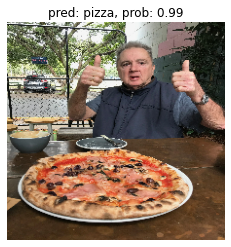

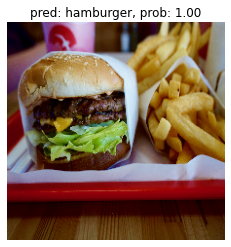

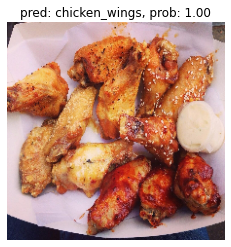

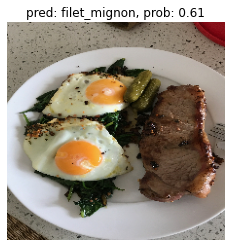

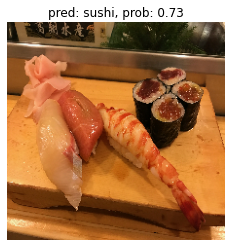

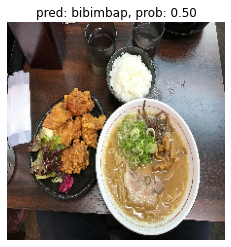

In [57]:
for img in custom_food_images:
  img = load_and_prep_image(img, scale=False) 
  pred_prob = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[pred_prob.argmax()] 
  plt.figure()
  plt.imshow(img/255.)
  plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f}")
  plt.axis(False)

Bir makine √∂ƒürenimi modelinin √∂nceden hazƒ±rlanmƒ±≈ü bir test veri setinde √ßalƒ±≈ütƒ±ƒüƒ±nƒ± g√∂rmek harika ama kendi verileriniz √ºzerinde √ßalƒ±≈ütƒ±ƒüƒ±nƒ± g√∂rmek akƒ±llara durgunluk veriyor.

Ve tahmin edin ne oldu... modelimiz eƒüitim g√∂r√ºnt√ºlerinin yalnƒ±zca %10'u ile bu inanƒ±lmaz sonu√ßlarƒ± (temel deƒüerden %10+ daha iyi) elde etti.